In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn import model_selection
import matplotlib.pyplot as plt
import time
import io 

In [ ]:
upload=files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
data=pd.read_csv("Iris.csv")

In [ ]:
print(data.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [ ]:
print(data.shape)

(150, 6)


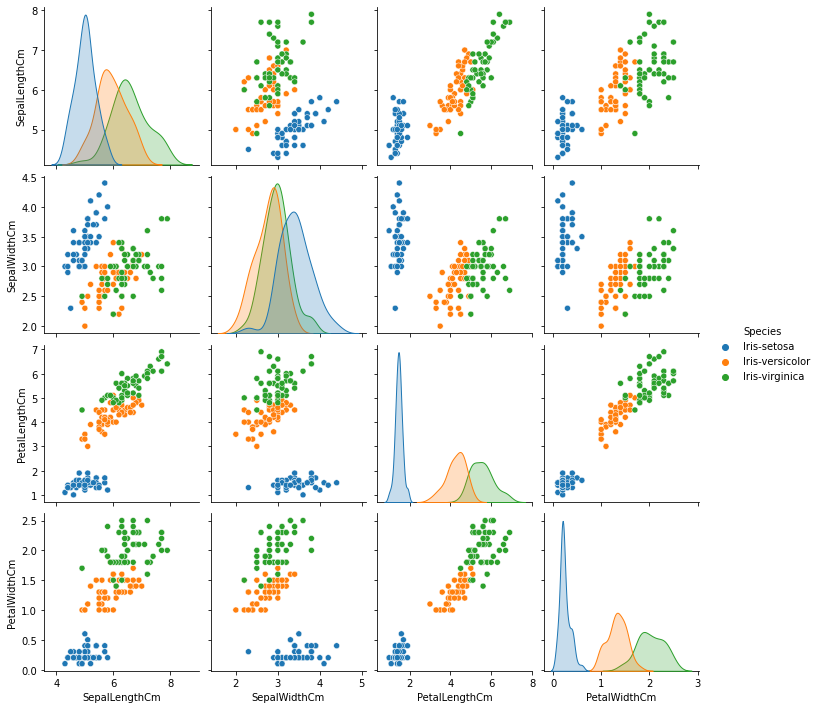

In [ ]:
print(sns.pairplot(data=data, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm') , hue='Species'))
plt.show()

In [ ]:
target=data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
print(target.head(10))

   Species
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0


In [ ]:
da=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df=pd.concat([da,target],axis = 1)
print(df.head(10))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0
5            5.4           3.9            1.7           0.4        0
6            4.6           3.4            1.4           0.3        0
7            5.0           3.4            1.5           0.2        0
8            4.4           2.9            1.4           0.2        0
9            4.9           3.1            1.5           0.1        0


In [ ]:
train, test =model_selection.train_test_split(df, test_size= 0.3)
trainX=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
trainY=train.Species
testX=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
testY=test.Species

In [ ]:
print(trainX.head(10))

print(trainY.head(10))

print (testX.head(10))

print(testY.head(10))
     

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
98             5.1           2.5            3.0           1.1
42             4.4           3.2            1.3           0.2
68             6.2           2.2            4.5           1.5
46             5.1           3.8            1.6           0.2
16             5.4           3.9            1.3           0.4
31             5.4           3.4            1.5           0.4
48             5.3           3.7            1.5           0.2
6              4.6           3.4            1.4           0.3
107            7.3           2.9            6.3           1.8
102            7.1           3.0            5.9           2.1
98     1
42     0
68     1
46     0
16     0
31     0
48     0
6      0
107    2
102    2
Name: Species, dtype: int64
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
123            6.3           2.7            4.9           1.8
36             5.5           3.5            1.3           0.2
100           

In [ ]:
%%time
clf=MLPClassifier(solver='lbfgs',alpha=1e-05, hidden_layer_sizes=(3,3),epsilon=0.07,max_iter=150)
print(clf.fit(trainX,trainY))

MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(3, 3),
              max_iter=150, solver='lbfgs')
CPU times: user 99.1 ms, sys: 3.95 ms, total: 103 ms
Wall time: 103 ms


In [ ]:
%pip install mlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


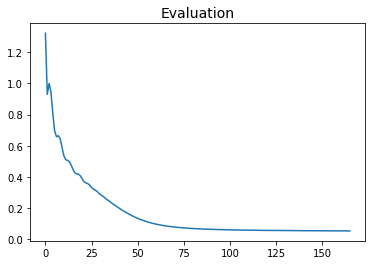

[2 0 2 0 0 2 0 2 0 1 2 0 1 1 2 0 0 2 0 2 2 0 2 2 1 2 2 2 0 1 1 1 1 1 0 1 0
 2 1 2 2 0 0 2 2]
[2 0 2 0 0 2 0 2 0 1 2 0 2 1 2 0 0 2 0 2 2 0 2 2 1 2 2 2 0 1 1 1 2 1 0 1 0
 2 1 2 2 0 0 2 2]
the accuracy is : 0.9555555555555556


In [ ]:
plt.plot(mlp.loss_curve_)
plt.title("Evaluation",fontsize=14)
plt.show()

prediction =clf.predict(testX)
print(prediction)
print (testY.values)

print('the accuracy is :',metrics.accuracy_score(prediction,testY))

In [ ]:
%pip install pretty_confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 4.9 MB/s 
     |████████████████████████████████| 73 kB 1.3 MB/s 
     |████████████████████████████████| 9.4 MB 65.8 MB/s 
     |████████████████████████████████| 103 kB 60.3 MB/s 
     |████████████████████████████████| 156 kB 69.8 MB/s 
     |████████████████████████████████| 41 kB 570 kB/s 
     |████████████████████████████████| 68 kB 7.9 MB/s 
     |████████████████████████████████| 295 kB 62.3 MB/s 
     |████████████████████████████████| 965 kB 54.6 MB/s 
     |████████████████████████████████| 98 kB 9.4 MB/s 
     |████████████████████████████████| 8.8 MB 44.1 MB/s 
     |████████████████████████████████| 468 kB 73.1 MB/s 
  Attempting uninstall: tomli
    Found existing installation: tomli 2.0.1
    Uninstalling tomli-2.0.1:
      Successfully uninstalled tomli-2.0.1
  Attempting uninstall: matplotlib
    Found existing installation

/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:200: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:201: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:203: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/usr/local/lib/python3.8/dist-packages/pretty_confusion_matrix/pretty_confusion_matrix.py:204: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be remo

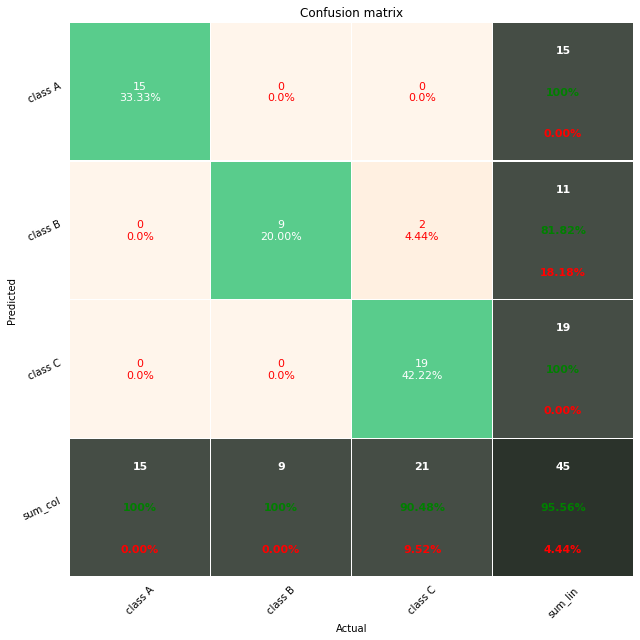

In [ ]:
from pretty_confusion_matrix import pp_matrix_from_data
cmap='PuRd' 
pp_matrix_from_data(testY.values,prediction)

In [ ]:
params= [
    {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.2,
        "max_iter":150,
    },
      {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.7,
        "max_iter":300,
    },
  {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init":0.2,
        "max_iter":300,
    },
      {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init":0.7,
        "max_iter":150,
    },
    {
       "solver" :"adam",
       "learning_rate_init":0.01,
      "max_iter":300,

    },

]
labels= [
    "constant learning-rate_0.2",
    "constant learning-rate_0.7",
    "invscaling learning-rate_0.2",
    "invscaling learning-rate_0.7",
    "adam",

]
plot_args = [
    {"c":"red","linestyle":"-"},
    {"c":"green","linestyle":"-"},
    {"c":"blue","linestyle":"-"},
    {"c":"red","linestyle":"--"},
    {"c":"green","linestyle":"--"},
]

In [ ]:
mlps=[]
for label,param in zip(labels,params):
  print("training:%s" % label)
  mlp=MLPClassifier(random_state=0,**param)
  mlp.fit(trainX,trainY)
  mlps.append(mlp)
  print("Training set score : %f" % mlp.score(trainX,trainY))

training:constant learning-rate_0.2
Training set score : 0.390476
training:constant learning-rate_0.7
Training set score : 0.390476
training:invscaling learning-rate_0.2


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score : 0.971429
training:invscaling learning-rate_0.7
Training set score : 0.971429
training:adam
Training set score : 0.980952


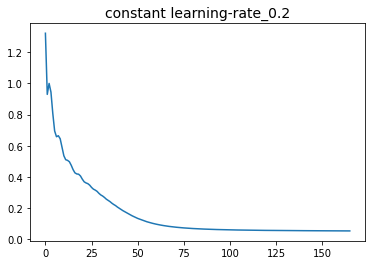

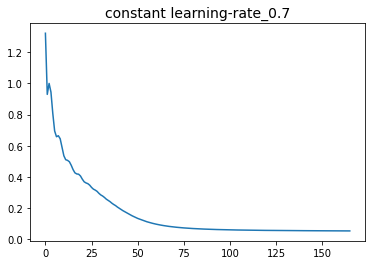

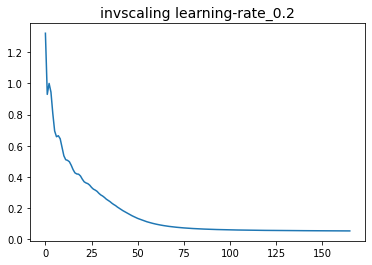

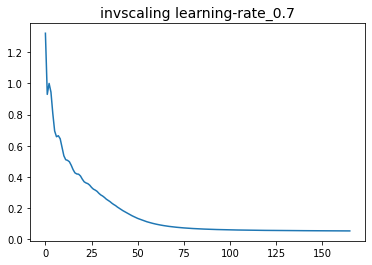

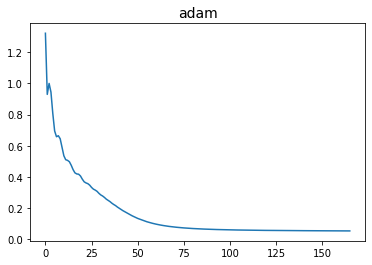

In [ ]:
for nlp, label, args in zip(mlps,labels,plot_args):
  plt.plot(mlp.loss_curve_)
  plt.title(label,fontsize=14)
  plt.show()

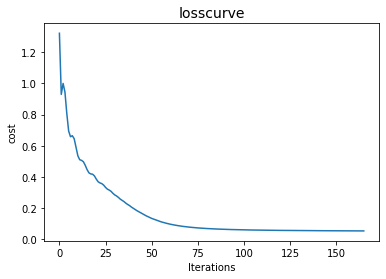

In [ ]:
plt.plot(mlp.loss_curve_)
plt.title("losscurve",fontsize=14)
plt.xlabel("Iterations")
plt.ylabel("cost")
plt.show()

In [ ]:
%pip install sklearn_som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn_som.som import SOM
iris=datasets.load_iris()
iris_data=iris.data
iris_data.shape

(150, 4)

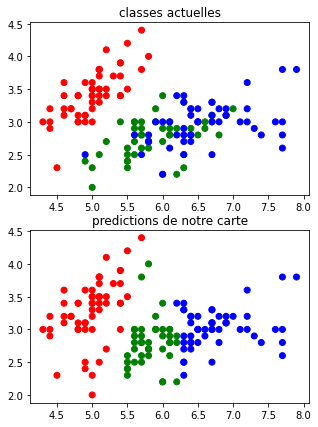

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn_som.som import SOM
iris=datasets.load_iris()
iris_data=iris.data
iris_label=iris.target
iris_data=iris_data[:,:2]
som=SOM(m=3, n=1, dim=2, random_state=1234)
som.fit(iris_data)
predictions=som.predict(iris_data)
fig,ax =plt.subplots(nrows=2, ncols=1, figsize=(5,7))
x=iris_data[:,0]
y=iris_data[:,1]
colors=['red','green','blue']
ax[0].scatter(x,y,c=iris_label,cmap=ListedColormap(colors))
ax[0].title.set_text('classes actuelles')
ax[1].scatter(x,y,c=predictions,cmap=ListedColormap(colors))
ax[1].title.set_text('predictions de notre carte')
     

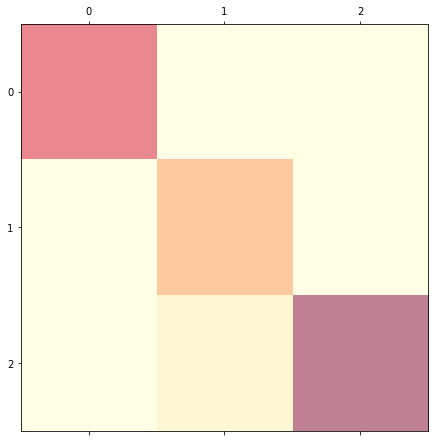

In [ ]:
from sklearn.metrics import confusion_matrix
mat_con=(confusion_matrix(testY.values,prediction, labels=[0,1,2]))
fig, px=plt.subplots(figsize=(7.5,7.5))
px.matshow(mat_con,cmap=plt.cm.YlOrRd,alpha=0.5)